# Lab 4.06 - Bivariate Analysis of Qualitative Data


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 6 - Influence of background music on purchasing behaviour

Market research shows that background music in a supermarket can influence the purchasing behaviour of customers. A study compared three methods: no music, French chansons and Italian hits. In each case, the number of bottles of French, Italian and other wines sold was counted (Ryan, et al., 1998).

The research data can be found in the file data/MuziekWijn.csv.

1. Set up the correct crosstab.
2. Determine the marginal totals.
3. Determine the expected results.
4. Calculate the χ² test statistic.
5. Calculate Cramér's V. What can you conclude from this?

Visualize the data set:

1. Plot a bar chart showing the percentages of types of wine sold when no music was playing.
2. Plot a clustered bar chart of the dataset
3. Plot a bar chart (stacked bar chart) of the dataset

Results of the main calculations (rounded up to 3 decimal places):

* χ² ≈ 18.279
* Cramér's V ≈ 0.194

In [9]:
wines = pd.read_csv('../data/MuziekWijn.csv')

Read the dataset

In [10]:
wines

,Muziek,Wijn
0,Geen,Franse
1,Franse,Franse
2,Franse,Italiaanse
3,Italiaanse,Andere
4,Italiaanse,Franse
...,...,...
238,Geen,Andere
239,Franse,Franse
240,Franse,Franse
241,Franse,Franse


Give the names of both columns. What is wrong?

In [11]:
wines.columns

Index(['Muziek', ' Wijn'], dtype='object')

You can change the name of a column 'ab' to the column 'abc' of the dataframe df, using the following command

`df = df.rename(columns={'ab': 'abc'})`

Use this command to change the column name.  
Check afterwards if the result is correct.

In [13]:
wines = wines.rename(columns={' Wijn':'Wijn'})
wines.columns

Index(['Muziek', 'Wijn'], dtype='object')

1. Set up the correct crosstab.

In [14]:
observed = pd.crosstab(wines['Muziek'], wines['Wijn'])

2. Determine the marginal totals.

In [16]:
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()

print(f"row:", row_sums)
print(f"col:", col_sums)
print(f'Number of observations: {n}')

row: Muziek
Franse        75
Geen          84
Italiaanse    84
dtype: int64
col: Wijn
Andere        113
Franse         99
Italiaanse     31
dtype: int64
Number of observations: 243


3. Determine the expected results.

In [17]:
expected = np.outer(row_sums, col_sums) / n
expected

array([[34.87654321, 30.55555556,  9.56790123],
       [39.0617284 , 34.22222222, 10.71604938],
       [39.0617284 , 34.22222222, 10.71604938]])

4. Calculate the χ² test statistic.

In [39]:
chi2, p, df, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)

alpha = .05
g = stats.chi2.isf(alpha, df = df)
print("Critical value     : %.4f" % g)

print(f"Chi-squared {chi2:.4f} > Critical value {g:.4f} -> dus reject H0")
print(f"P-value {p:.4f} < alpha {alpha:.4f} -> dus reject H0")

Chi-squared       : 18.2792
Degrees of freedom: 4
P-value           : 0.0011
Critical value     : 9.4877
Chi-squared 18.2792 > Critical value 9.4877 -> dus reject H0
P-value 0.0011 < alpha 0.0500 -> dus reject H0


5. Calculate Cramér's V. What can you conclude from this?

In [38]:
cramers_v = stats.contingency.association(observed, method='cramer')
print(f"Cramer's V: {cramers_v:.4f} -> weak to moderate association")

Cramer's V: 0.1939 -> weak to moderate association


Plot a bar chart showing the percentages of types of wine sold when no music was playing.

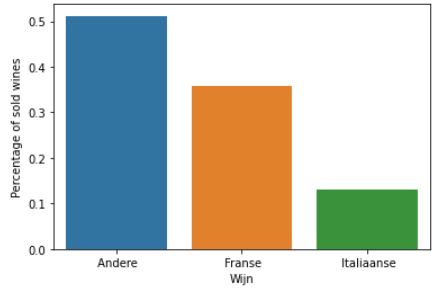

Text(0, 0.5, 'sold wines')

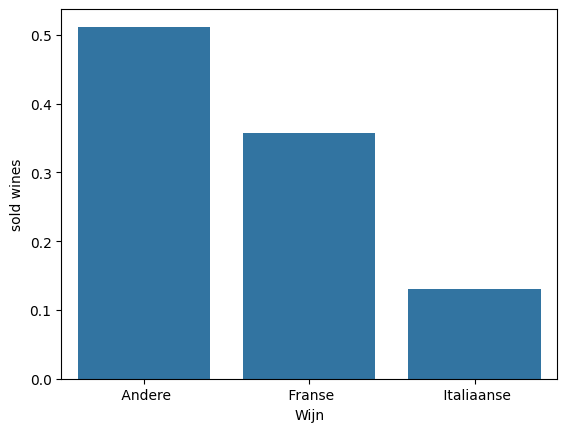

In [37]:
sns.barplot(
  x=observed.loc["Geen"].index,
  y=observed.loc["Geen"] / np.sum(observed.loc["Geen"])
)
plt.ylabel("sold wines")

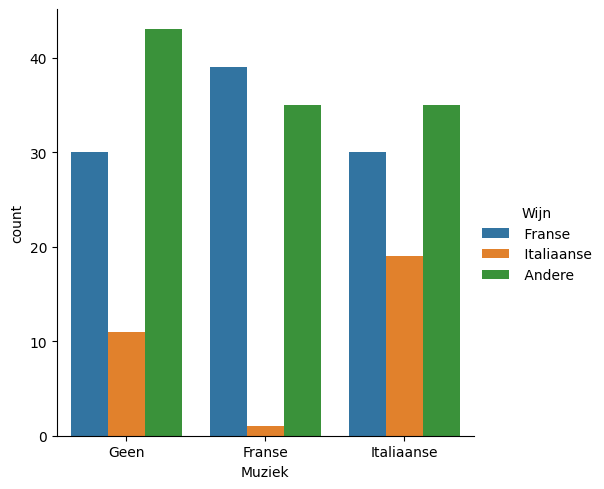

In [26]:
sns.catplot(data=wines, x='Muziek', hue='Wijn', kind='count')

Plot a clustered bar chart of the dataset  

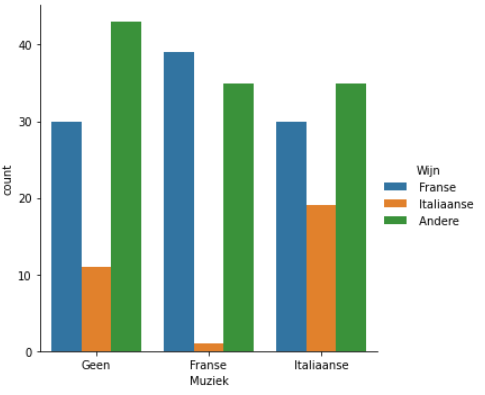

Plot a bar chart (stacked bar chart) of the dataset

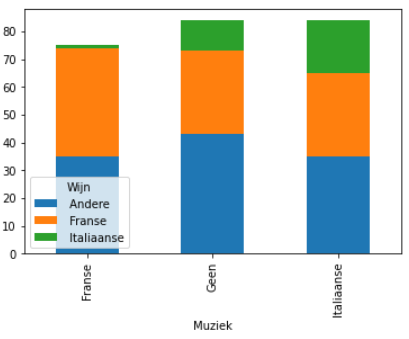

<Axes: xlabel='Muziek'>

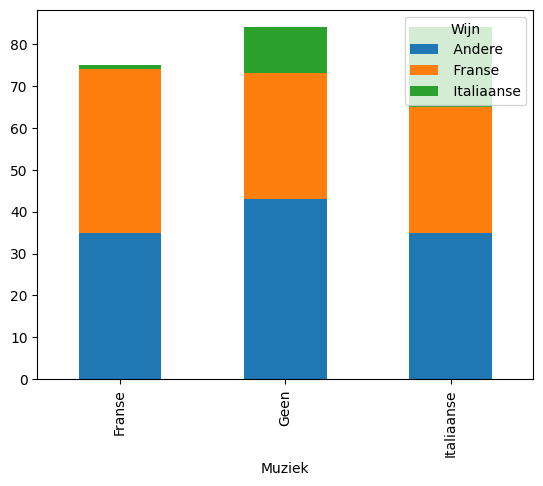

In [34]:
observed.plot(kind='bar', stacked=True)